# Exercises 1

### Use the iris database to answer the following quesitons:

## 1. What does the distribution of petal lengths look like?

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [59]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [60]:
url = get_db_url('iris_db')

In [61]:
sql = """
SElECT * FROM species
JOIN measurements ON measurements.species_id = species.species_id
"""

In [62]:
df_petals = pd.read_sql(sql, url)
df_petals.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,setosa,1,5.1,3.5,1.4,0.2,1
1,1,setosa,2,4.9,3.0,1.4,0.2,1
2,1,setosa,3,4.7,3.2,1.3,0.2,1
3,1,setosa,4,4.6,3.1,1.5,0.2,1
4,1,setosa,5,5.0,3.6,1.4,0.2,1


In [63]:
petals = sns.load_dataset('iris')
petals

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [64]:
petals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


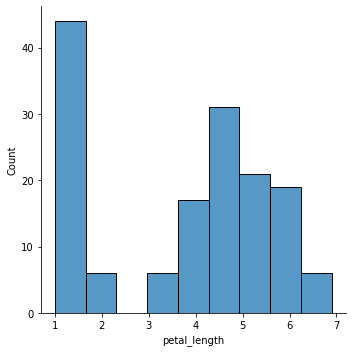

In [65]:
sns.displot(x='petal_length', data=petals)

## 2. Is there a correlation between petal length and petal width?

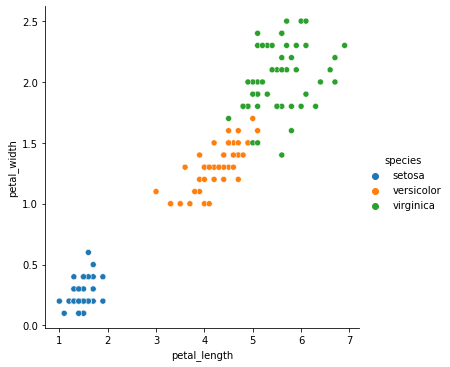

In [67]:
sns.relplot(data=petals, x='petal_length', y='petal_width', hue='species') # yes, positive correlation

## 3. Would it be reasonable to predict species based on sepal width and sepal length?

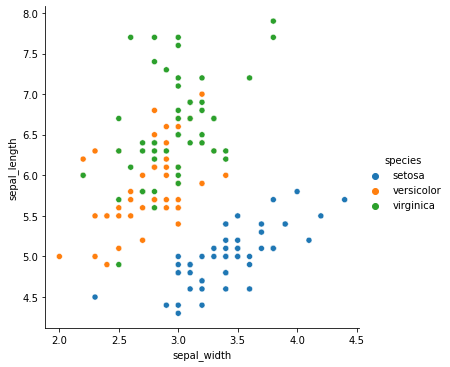

In [68]:
sns.relplot(data=petals, x='sepal_width', y='sepal_length', hue='species') #yes, setosa has smaller length with larger width

## 4. Which features would be best used to predict species?

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

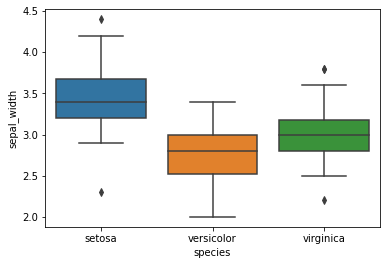

In [71]:
sns.boxplot(data=petals, x='species', y='sepal_width')

# Exercise 2

## 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice? Plot the x and y values from the anscombe data. Each dataset should be in a separate column

In [73]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [74]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [75]:
anscombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [78]:
anscombe.groupby('dataset').agg(['min','max','std'])

x                     y                 
         min   max       std   min    max       std
dataset                                            
I        4.0  14.0  3.316625  4.26  10.84  2.031568
II       4.0  14.0  3.316625  3.10   9.26  2.031657
III      4.0  14.0  3.316625  5.39  12.74  2.030424
IV       8.0  19.0  3.316625  5.25  12.50  2.030579

In [76]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

##  Plot the x and y values from the anscombe data. Each dataset should be in a separate column

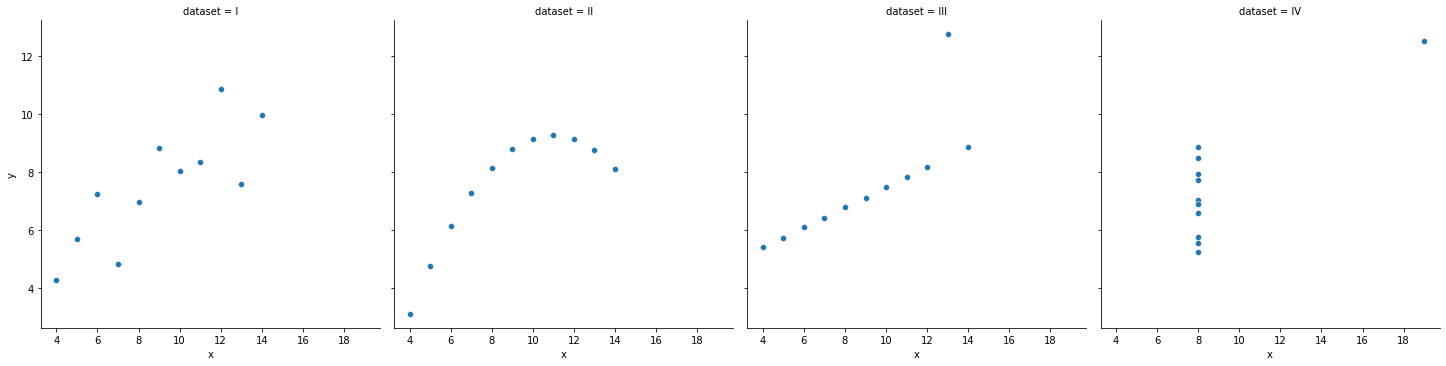

In [80]:
sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')

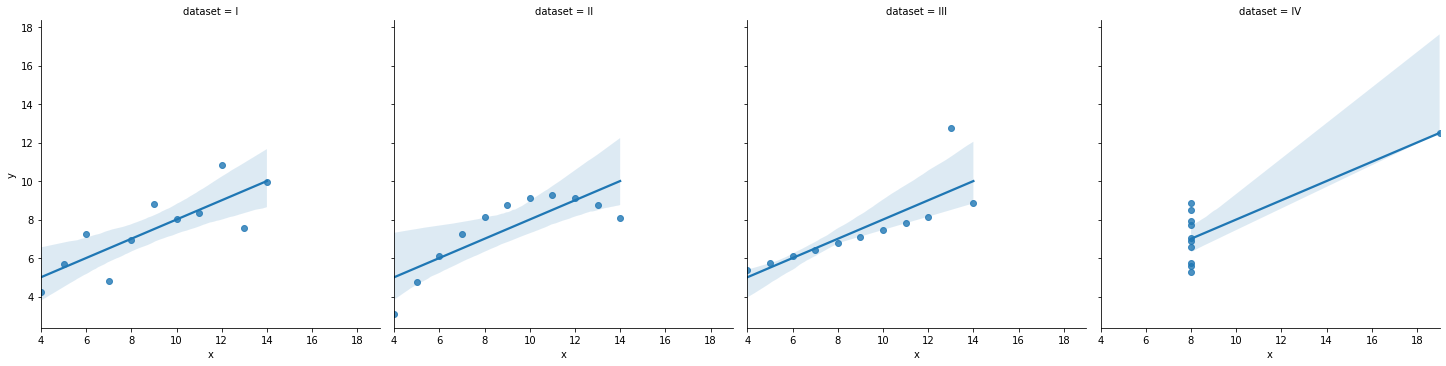

In [82]:
sns.lmplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')

## 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [17]:
InsectSprays = data('InsectSprays')

In [18]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [22]:
InsectSprays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


<AxesSubplot:xlabel='spray', ylabel='count'>

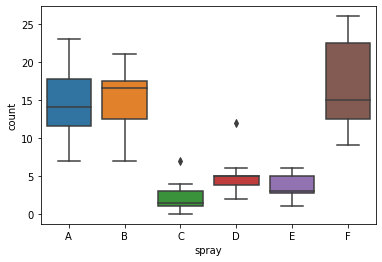

In [26]:
sns.boxplot(data=InsectSprays, y='count', x='spray')

## 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [84]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [85]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [86]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


### Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [87]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


### Does whether or not a province is Catholic influence fertility?

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

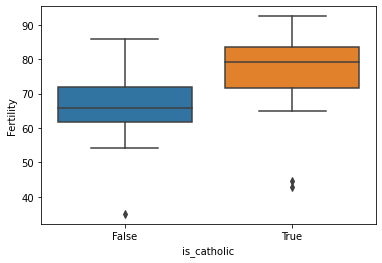

In [88]:
sns.boxplot(data=swiss,x='is_catholic',y = 'Fertility')

### What measure correlates most strongly with fertility?

In [89]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
 6   is_catholic       47 non-null     bool   
dtypes: bool(1), float64(4), int64(2)
memory usage: 3.7+ KB


In [90]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

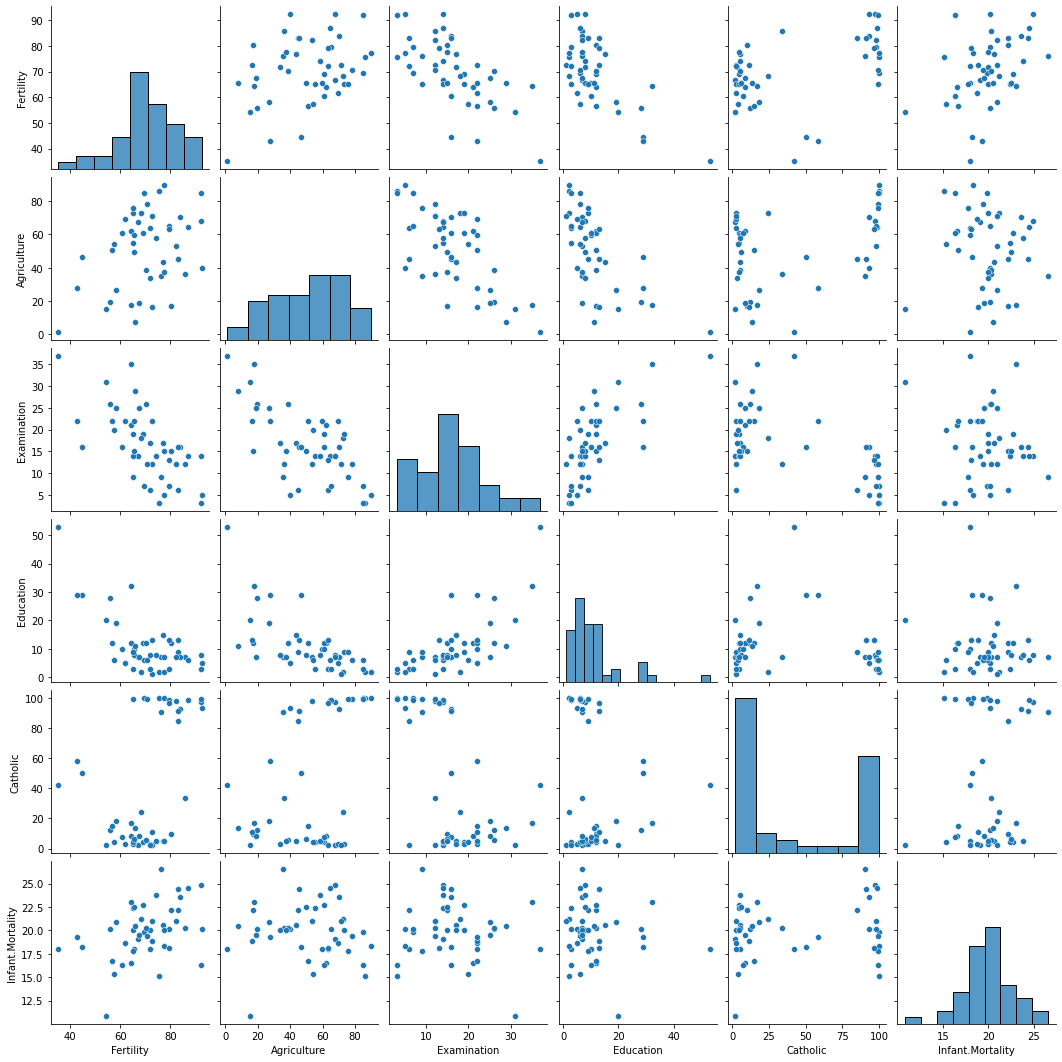

In [92]:
sns.pairplot(data = swiss.iloc[:, :-1])

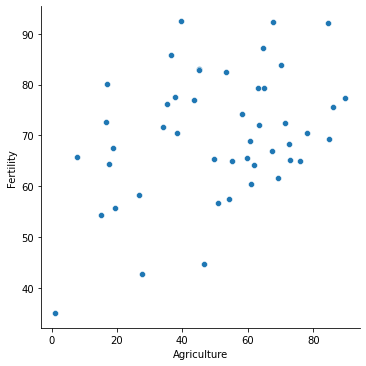

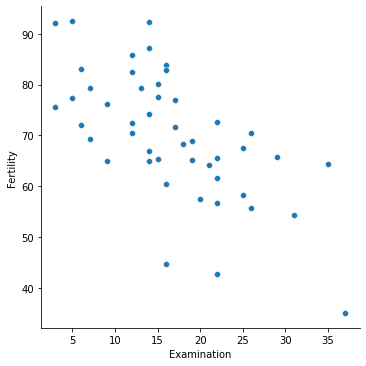

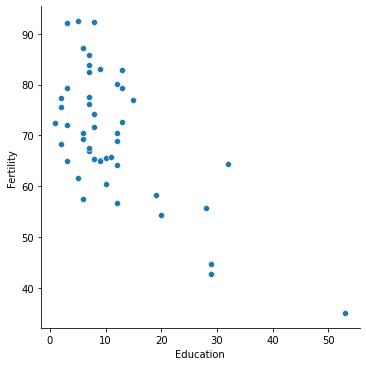

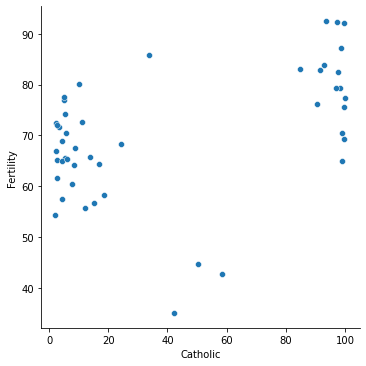

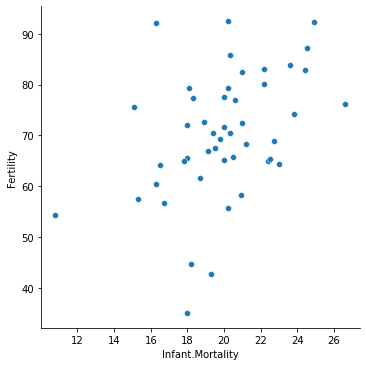

In [93]:
for col in swiss.columns[1:-1]:
    sns.relplot(data = swiss, y = 'Fertility', x = col)

## 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [5]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [6]:
url = get_db_url('chipotle')
sql = "SELECT * FROM orders"
orders = pd.read_sql(sql, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [8]:
orders.item_price = orders.item_price.str.replace('$','').astype('float')

<ipython-input-8-35151beaac71>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders.item_price = orders.item_price.str.replace('$','').astype('float')


In [9]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [10]:
pop_items = orders.groupby('item_name').quantity.sum().nlargest(4).index
pop_items

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [11]:
pop_item_rev = orders[orders.item_name.isin(pop_items)].groupby('item_name').item_price.sum()
pop_item_rev

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [12]:
pop_item_rev = pop_item_rev.reset_index()
pop_item_rev

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


Text(0, 0.5, 'Revenue')

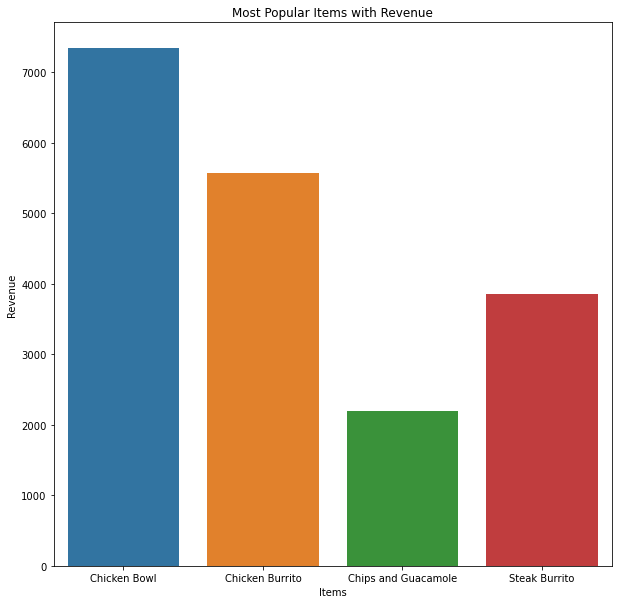

In [38]:
plt.figure(figsize = (10,10))
plt.title('Most Popular Items with Revenue')
sns.barplot(data=pop_item_rev, x='item_name', y='item_price')
plt.xlabel('Items')
plt.ylabel('Revenue')

## 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [15]:
sleep = data("sleepstudy")

In [50]:
sleep.Subject.unique()

array([308, 309, 310, 330, 331, 332, 333, 334, 335, 337, 349, 350, 351,
       352, 369, 370, 371, 372])

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

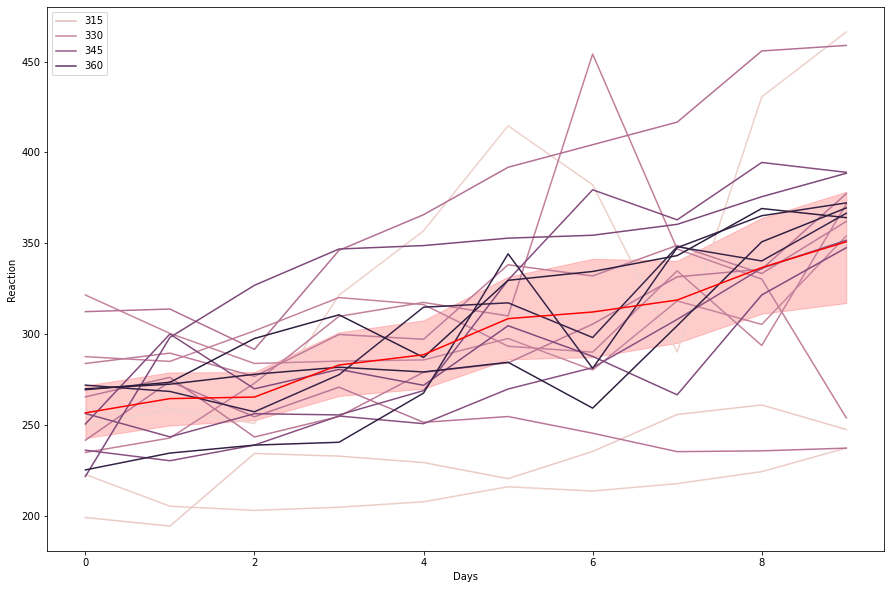

In [56]:
plt.figure(figsize = (15,10))

sns.lineplot(data=sleep, hue='Subject',  y='Reaction', x='Days')

sns.lineplot(data=sleep, x='Days', y='Reaction', color='red', estimator='mean')
